# Applied Machine Learning - Basic project
## Davide Lisi
### Master Degree in Bioinformatics - Alma Mater Studiorum - University of Bologna
### Followed the AML-Basic course in Spring 2020

# 1. Introduction
### In my project, I analyzed the Boston Project dataset. First of all, a brief description of the data:
The dataset describes properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. There are 13 input variables that describe the properties of a given Boston suburb. The full list of attributes in this dataset are as follows:

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 
5. NOX: nitric oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940. 
8. DIS: weighted distances to five Boston employment centers. 
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town. 
13. LSTAT: percentage lower status of the population.
14. MEDV: Median value of owner-occupied homes in thousands of dollars.

Since the target variable is included in the dataset ( **MEDV** ), this is a _supervised_ machine learning problem. Moreover, since MEDV (house price in thousands of dollars) is a _continuous_ variable, the type of ML problem is a **regression**.

In this project, I first implemented two linear models (**Linear Regression** and **Ridge Regression**) to perform predictions on the Boston dataset, evaluating their performances with different error metrics.

Afterwards, I also implemented an Ensemble regression model (**Stochastic Gradient Boosting**), and compared it's performance to the ones achieved by the simpler linear models, observing a significant increase of predictions accuracy.

# 2. Dataset and libraries import

In [ ]:
## Libraries and Modules import
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset import
from sklearn.datasets import load_boston
boston = load_boston()

# Convert the dataset in a Pandas Dataframe, with the column names specified in the 'feature_names' attribute of boston
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
names = list(data.columns)
data.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2
5,0.030,0.0,2.18,0.0,0.458,6.430,58.7,6.062,3.0,222.0,18.7,394.12,5.21,28.7
6,0.088,12.5,7.87,0.0,0.524,6.012,66.6,5.561,5.0,311.0,15.2,395.60,12.43,22.9
7,0.145,12.5,7.87,0.0,0.524,6.172,96.1,5.950,5.0,311.0,15.2,396.90,19.15,27.1


# 3. Data pre-processing


## 3.1 Basic Statistics

Checking if there is any missing value in any field

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Everything seems to be fine, no missing information.
Next, I determine the Data Shape (n° of examples and variables):

In [ ]:
shape = data.shape
shape                 # 506 rows, 14 fields (columns)

(506, 14)

.. and the data Type in each field:

In [ ]:
types = data.dtypes
types                 # all the fields contain floating point numbers

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Next, I computed a summary of the data (count, mean, stdev, min, 25%, 50%, 75%, max) in each field, to get an idea about the values ranges of the different variables.

In [ ]:
from pandas import set_option

# graphical settings
set_option('display.width', 200)
set_option('display.max_rows', 20)
set_option('display.max_columns', 20)
set_option('precision', 3)

description = data.describe()
print(description)

          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS      RAD      TAX  PTRATIO        B    LSTAT     MEDV
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795    9.549  408.237   18.456  356.674   12.653   22.533
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106    8.707  168.537    2.165   91.295    7.141    9.197
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130    1.000  187.000   12.600    0.320    1.730    5.000
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100    4.000  279.000   17.400  375.377    6.950   17.025
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207    5.000  330.000   19.050  391.440   11.360   21.200
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.18

## 3.2 Exploratory data analysis through visualization

Let's first explore the distributions of the different variables with some basic plots

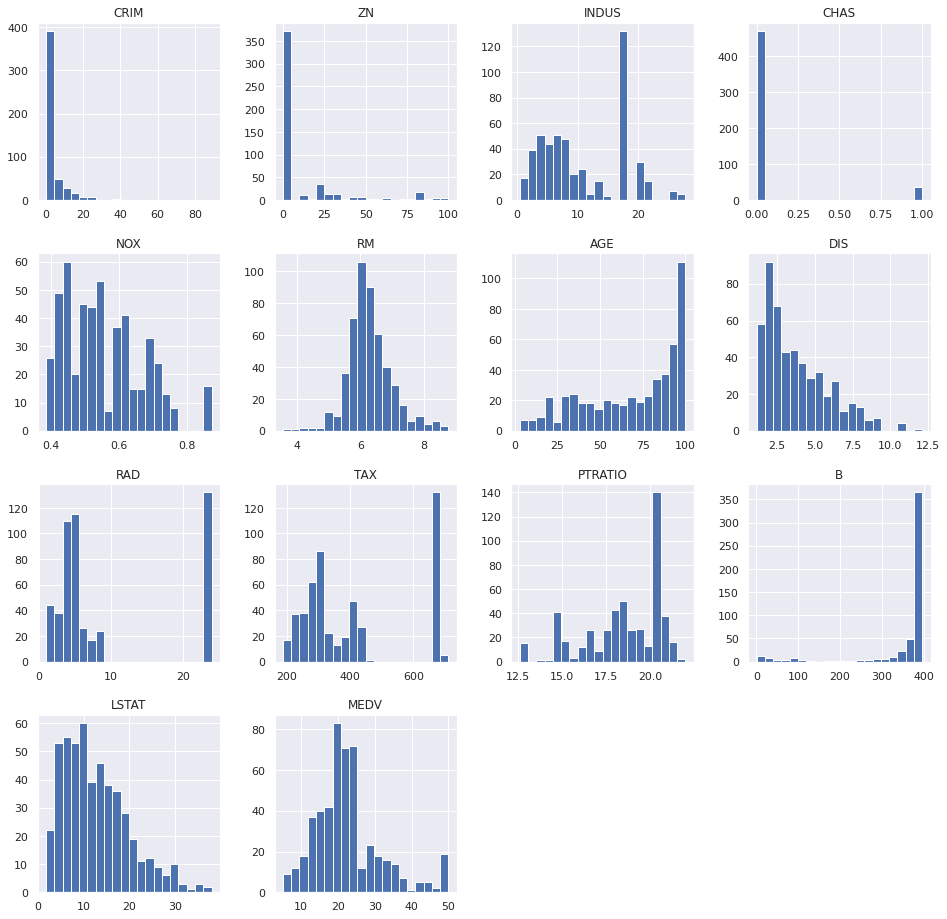

In [ ]:
# HISTOGRAMS
data.hist(bins=20)
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

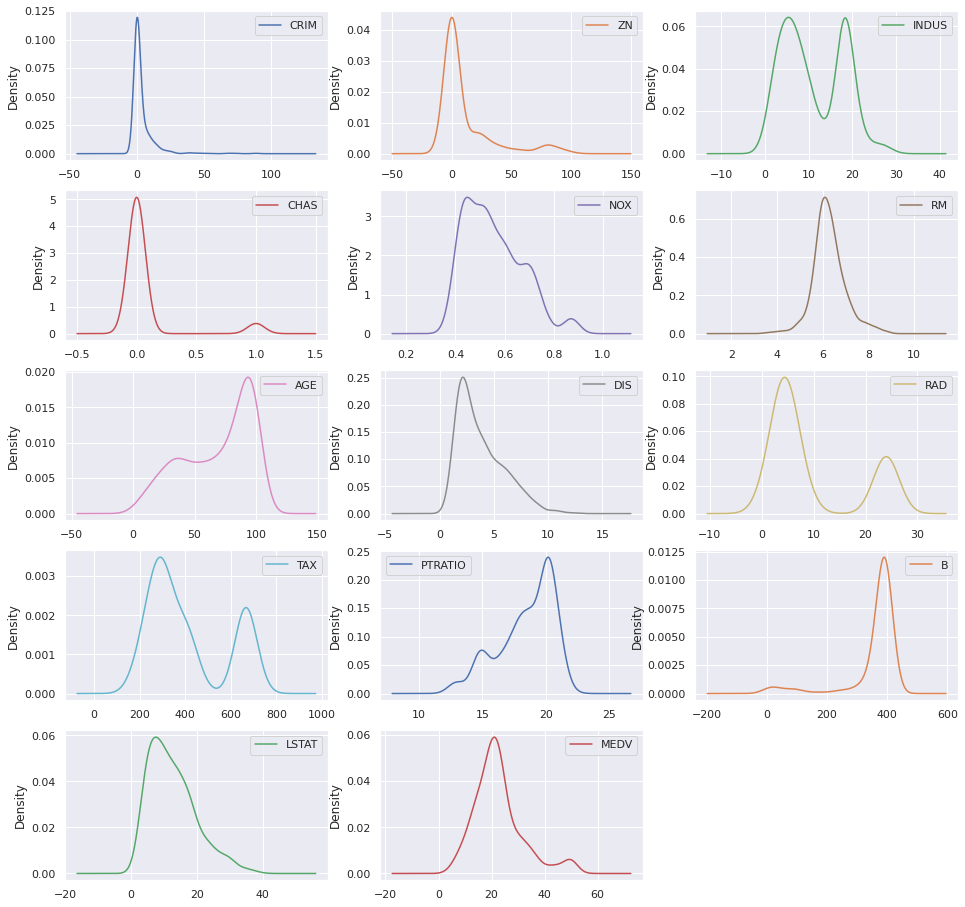

In [ ]:
# DENSITY DISTRIBUTIONS
data.plot(kind='density', subplots=True, layout=(5,3), sharex=False)
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

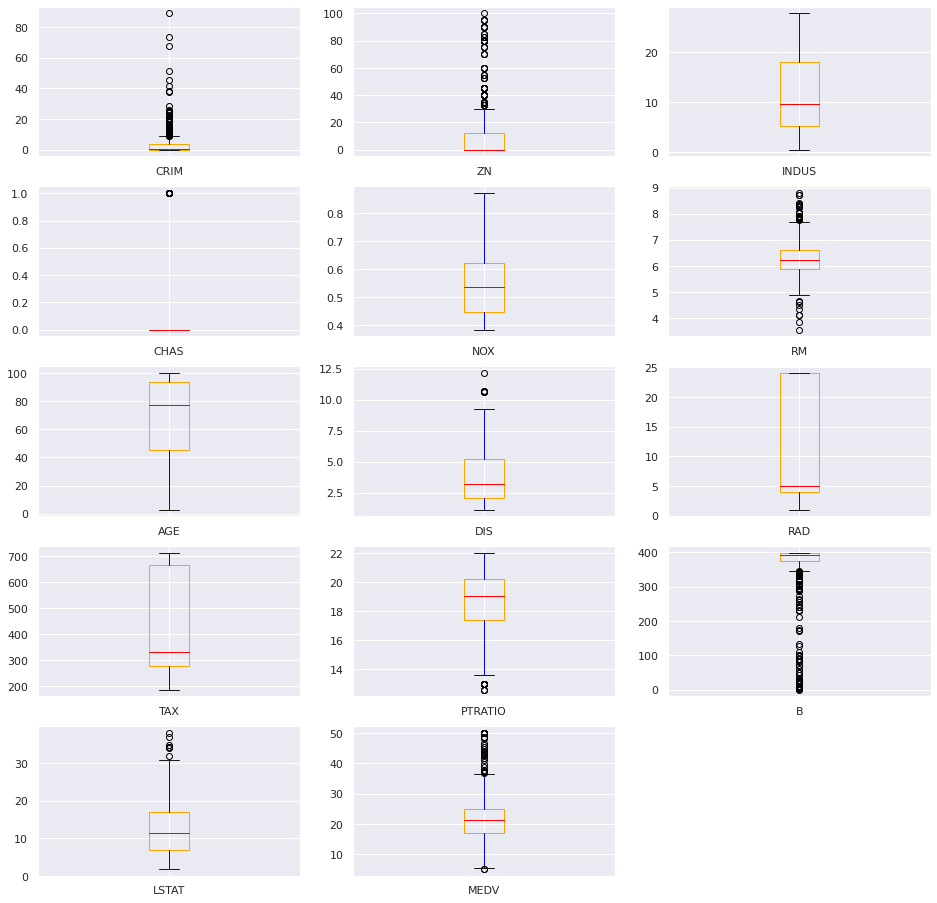

In [ ]:
# BOXPLOTS
color = { 'boxes':'Orange', 'medians':'Red', 'whiskers':'Blue'}
data.plot(kind='box', subplots=True, layout=(5,3), color=color, sharex=False, sharey=False)
plt.show()

## 3.3 Feature Importance

Since 'MEDV' is the target variable, I decided to visualize more in detail its distribution, using the Seaborn Distplot

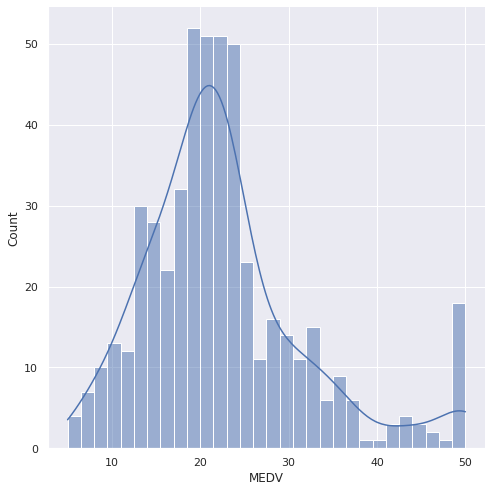

In [ ]:
sns.displot(data['MEDV'], kind='hist', kde=True, bins=30, height=7, aspect=1)

The distribution shows that most house prices are in the [15k;25k] interval, and the upper bound is 50k \$. Except for some outlayers (mainly represented by the top-tier prices aforementioned), the distribution is approximately Normal. Interestingly, the more "evident" outlayers are in fact the houses with the highest price (50'000$), causing the 'small hill' in the right tail of the distribution. 

Since these outlayers would definitely reduce the interpolation performance of my regression model(s), I shall remove these outlayers from the dataset

In [ ]:
# Investigate how many outlayers with MEDV = 50 are present in the dataset
n=0
for value in data['MEDV']:
  if value == 50 : n+=1
print('Number of "50k$" outlayers         : ' + str(n))

# Remove the n outlayers
print('Original data dimensions           : ' + str(data.shape))
data_filtered = data[data['MEDV']!=50]
print('Dimensions after outlayers removal : ' + str(data_filtered.shape))   # 16 points lost because they were outlayers

Number of "50k$" outlayers         : 16
Original data dimensions           : (506, 14)
Dimensions after outlayers removal : (490, 14)


Let's see how the 'MEDV' distribution has changed:

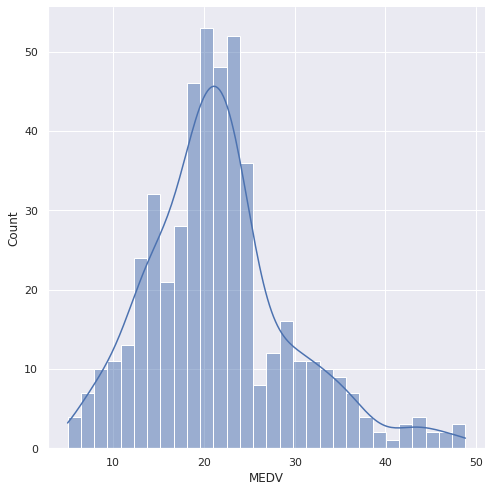

In [ ]:
sns.displot(data_filtered['MEDV'], kind='hist', kde=True, bins=30, height=7, aspect=1)

Next, it is important to evaluate which of the 13 feature variables are more strongly correlated (directly or inversely) with the target variable. To measure such correlations, I used the Pearson's Correlation Coefficient (PCC), ranging from -1 (perfect, inverse correlation) to +1 (perfect direct correlation). To visualize the different correlations, I used the Seaborn heatmap plot

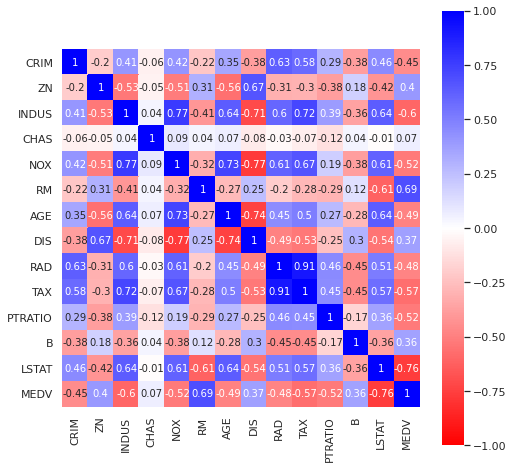

In [ ]:
correlation_matrix = data_filtered.corr(method='pearson').round(2)
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={'size':10}, square=True, cmap='bwr_r', vmin=-1, vmax=1)

Looking at the last row of the correlation matrix and appling a correlation coefficient threshold of |c| > 0.5 , we can see that the features passing this cutoff, *i.e.* the ones with the strongest (positive and negative) correlations to MEDV, are: INDUS, NOX, RM, TAX, PTRATIO and LSTAT. The strongest (and only) positive correlation to MEDV is achieved by RM (+0.69), while the strongest negative correlation is with LSTAT (-0.76).

In the perspective of performing a linear regression, I can visualize in a simple scatterplot the correlations between these feature variables and the target variable.

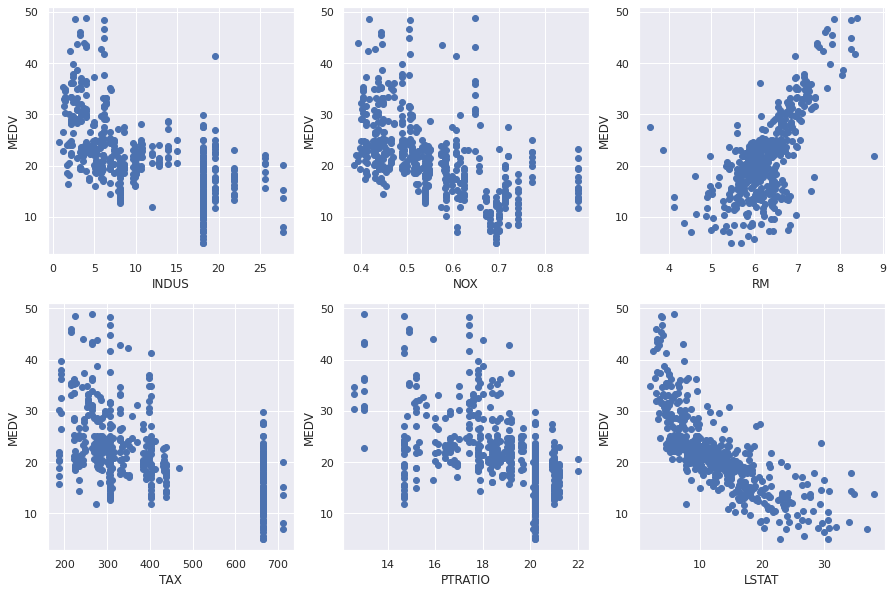

In [ ]:
plt.figure(figsize=(15,10))

features = ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

for i, col in enumerate(features):
    plt.subplot(2, len(features)/2, i+1)
    x = data_filtered[col]
    y = data_filtered['MEDV']
    plt.scatter(x, y, marker='o')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Observing the plots above, we can make some considerations:
1.   The variables INDUS, TAX and PTRATIO seem to have a not perfectly homogeneous distribution, with multiple houses with different prices but the exact same feature variable value, showing "vertical series of dots" on the plots
2.   The same fenomenon at 1. can be observed also for NOX, although in this case it is less marked, and the distribution of values is more homogeneous
3.   Except for some outlayers, a linear interpolation could describe the RM-MEDV correlation fairly well
4.   LSTAT also seems to have a good correlation, although it doesn't seem to be not perfectly linear 

All distributions are logically meaningful, for example: a lower concentration of nitric oxides (NOX) indicates cleaner air in the area, hence a higher price; a higher number of rooms (RM) is synthom of a larger building, thus a higher price; a lower fraction of lower status individuals (LSTAT) typically indicates a higher quality of life in the area, which once again corresponds to an increase in the cost.

Next, I will proceed to subset my data and select only these highly informative and most relevant features, together with the target variable:

In [ ]:
data_subset = data_filtered[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]
data_subset.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
count,490.000,490.000,490.000,490.000,490.00,490.000,490.000
mean,11.113,0.554,6.245,408.002,18.52,12.924,21.636
std,6.821,0.117,0.653,168.065,2.11,7.083,7.865
min,0.740,0.385,3.561,187.000,12.60,1.980,5.000
25%,5.190,0.449,5.881,280.250,17.40,7.348,16.700
50%,9.690,0.538,6.185,330.000,19.10,11.675,20.900
75%,18.100,0.624,6.578,666.000,20.20,17.117,24.675
max,27.740,0.871,8.780,711.000,22.00,37.970,48.800


With Seaborn, I can visualize the correlation between the selected variables, and their individual distributions.

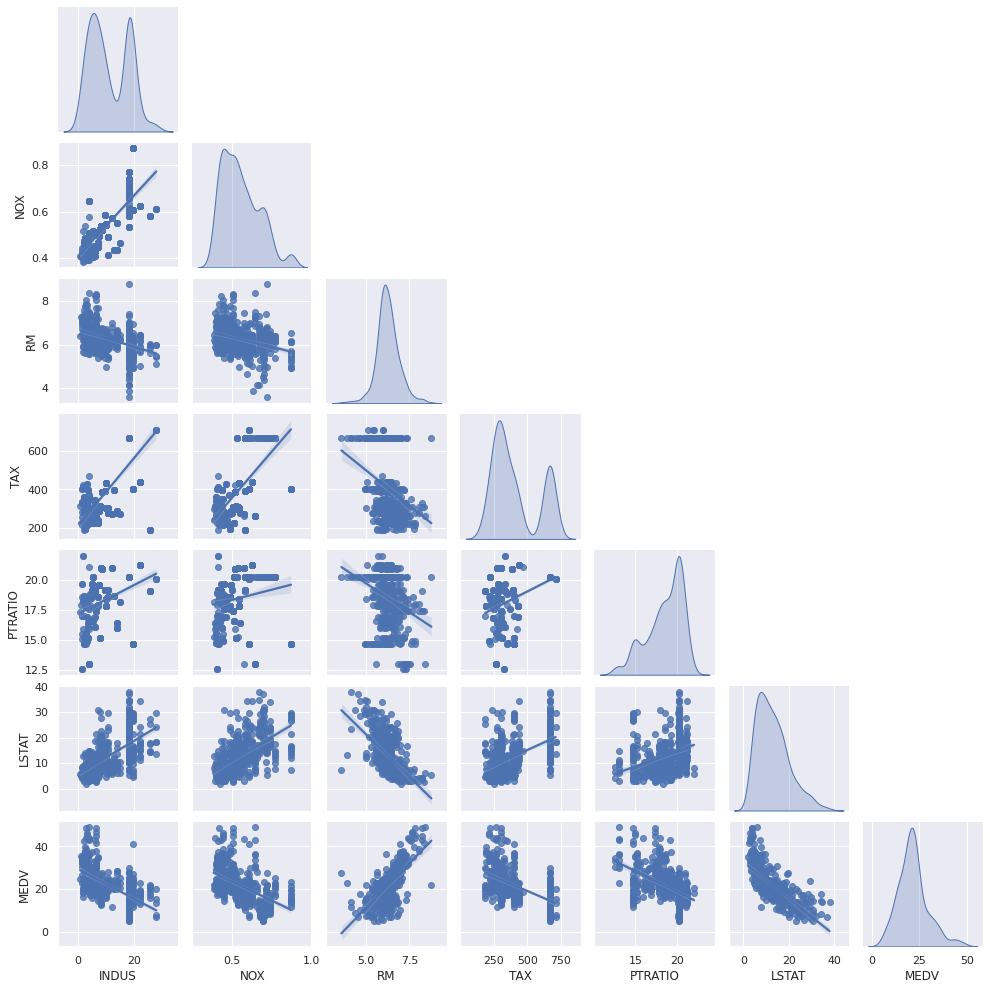

In [ ]:
sns.pairplot(data_subset, height=2, corner=True, diag_kind="kde", kind="reg")

Finally, I can proceed to separate the data into input variables (X) and output values (Y).

In [ ]:
array = data_subset.values
X = array[:,:-1]    #   data = feature variables ['INDUS', 'RM', 'LSTAT']
Y = array[:,-1]     # labels = target variable   ['MEDV']

## 3.4 Feature scaling and Standardization of the data

To improve the performance of the Gradient Descent (or other analogous) procedure, that is typically implemented to identify the set of parameters minimizing the cost function of a linear regression, one shall first "manipulate" the data a little.

Specifically, I can perform Feature Scaling, to map (rescale) all feature variables in the [0;1] interval. Alternatively, I can also perform a Standardization, to have the data with mean = 0 and std.dv. = 1.

Both these procedures will typically allow GD to converge faster to the solution of the minimization problem.

However, since the Boston dataset I used is not excessively large, the convergence was already quick enough and I did not need to exploit the aforementioned techniques. Nevertheless, I will include in this section the code lines I wrote to implement them.

### 3.4.1 Feature scaling

In [ ]:
# Import modules
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

# Rescale input data (between 0 and 1)
MMscaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = MMscaler.fit_transform(X)

# summarize original data..
set_printoptions(precision=3)
print('ORIGINAL VALUES:')
print(X[0:3,:])

# .. and rescaled data
print('0-1 RESCALED VALUES:')
print(rescaledX[0:3,:])

ORIGINAL VALUES:
[[  2.31    0.538   6.575 296.     15.3     4.98 ]
 [  7.07    0.469   6.421 242.     17.8     9.14 ]
 [  7.07    0.469   7.185 242.     17.8     4.03 ]]
0-1 RESCALED VALUES:
[[0.058 0.315 0.578 0.208 0.287 0.083]
 [0.234 0.173 0.548 0.105 0.553 0.199]
 [0.234 0.173 0.694 0.105 0.553 0.057]]


In [ ]:
# Verifying that now min = 0 and max = 1 for each feature variable
pd.DataFrame(rescaledX, columns= data_subset.columns[[0,1,2,3,4,5]]).describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,490.000,490.000,490.000,490.000,490.000,490.000
mean,0.384,0.348,0.514,0.422,0.630,0.304
std,0.253,0.240,0.125,0.321,0.225,0.197
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.165,0.132,0.445,0.178,0.511,0.149
50%,0.331,0.315,0.503,0.273,0.691,0.269
75%,0.643,0.492,0.578,0.914,0.809,0.421
max,1.000,1.000,1.000,1.000,1.000,1.000


As we can see above, the input features have ben rescaled to the [0;1] interval.

### 3.4.2 Standardization

In [ ]:
# Import module
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

# Standardize data (0 mean, 1 stdev)
Sscaler = StandardScaler().fit(X)
stdizedX = Sscaler.transform(X)

# summarize original data..
set_printoptions(precision=3)
print('ORIGINAL VALUES:')
print(X[0:3,:])

# .. and the transformed data
print('STANDARDIZED VALUES:')
print(stdizedX[0:3,:])

ORIGINAL VALUES:
[[  2.31    0.538   6.575 296.     15.3     4.98 ]
 [  7.07    0.469   6.421 242.     17.8     9.14 ]
 [  7.07    0.469   7.185 242.     17.8     4.03 ]]
STANDARDIZED VALUES:
[[-1.292 -0.14   0.505 -0.667 -1.527 -1.123]
 [-0.593 -0.732  0.269 -0.989 -0.342 -0.535]
 [-0.593 -0.732  1.44  -0.989 -0.342 -1.257]]


In [ ]:
# Verifying that now mean ~= 0 and std.dv. ~= 1 for each feature variable
pd.DataFrame(stdizedX, columns= data_subset.columns[[0,1,2,3,4,5]]).describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,4.900e+02,4.900e+02,4.900e+02,4.900e+02,4.900e+02,4.900e+02
mean,6.598e-16,6.420e-16,2.247e-16,9.539e-16,2.646e-16,3.376e-17
std,1.001e+00,1.001e+00,1.001e+00,1.001e+00,1.001e+00,1.001e+00
min,-1.522e+00,-1.452e+00,-4.114e+00,-1.316e+00,-2.808e+00,-1.547e+00
25%,-8.692e-01,-9.034e-01,-5.586e-01,-7.609e-01,-5.312e-01,-7.881e-01
50%,-2.088e-01,-1.399e-01,-9.268e-02,-4.646e-01,2.751e-01,-1.765e-01
75%,1.025e+00,5.979e-01,5.096e-01,1.537e+00,7.968e-01,5.926e-01
max,2.440e+00,2.717e+00,3.884e+00,1.805e+00,1.651e+00,3.540e+00


As we can see above, for each feature variable the mean and std.dv. are approximately 0 and 1, respectively

# 4 Linear models development

## 4.1 Linear regression

**LinearRegression** fits a linear model with coefficients $w$ = ($w_1$, …, $w_p$) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Since the dataset available is not particularly large (506 examples in total), I decided to perform the Train vs Test split in the proportion 3:1, so that I will use 25% of the dataset as Testing set, and the remaining 75% will be the training set.
I will fit my model to the training set, and then use the trained linear model to perform predictions on the test set.

In [ ]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set the parameters for the Train vs Test spliting
test_size = 0.25
seed = 9

# Evaluate using a Train and a Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LinearRegression()                  # model definition
model.fit(X_train, Y_train)                 # train on the training set
result = model.score(X_test, Y_test)        # measure the accuracy  on the test set
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 71.325%


The Linear regressor implemented scored a quite high accurancy of 71.32%. Logically, the closer the accuracy is to 100% (1.0), the better the predictions.

We can visualize the distribution of residuals (_i.e._ the differences between model predictions and actual values) for the test set. It is clear to see they are normally distributed around 0.

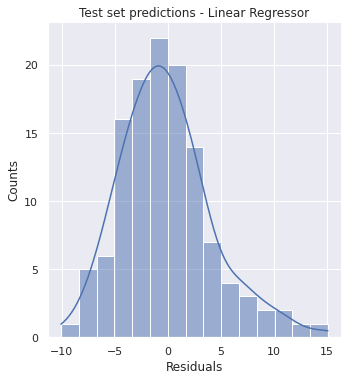

In [ ]:
# Plot the residuals on the Test set
Y_pred = model.predict(X_test)
ax = sns.displot(Y_test-Y_pred, kind='hist', kde=True, bins=15, aspect=1)
ax.set(xlabel="Residuals", ylabel="Counts", title="Test set predictions - Linear Regressor")

Let's also visualize the line representing the regression of my model

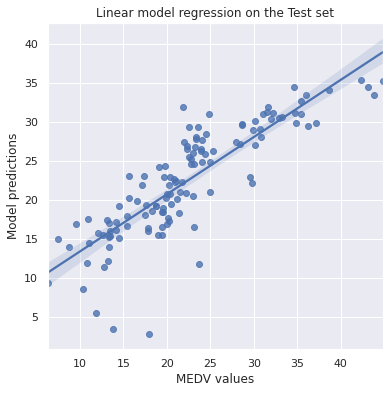

In [ ]:
# Regression plot
plt.figure(figsize=(6,6))
ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set(xlabel='MEDV values', ylabel='Model predictions', title="Linear model regression on the Test set")
plt.show()

As we can see, except for some outlayers, the Linear model seems to fit reasonably well the Test set, and the majority of predictions are close to the actual values.

### 4.1.1 Train-vs-Test splitting with different seeds

Using an arbitrary value (9) for the random seed, I obtained an accurancy of 71.32%. To get a more realistic estimate of the general performance of my linear regressor, let's test multiple random seed values, and compute the average performance over the different runs:

In [ ]:
# Testing multiple seeds to get an average accurancy value
acc = []
avg = 0
for seed in range(1,11):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))   
    acc.append(output_result)
    avg += output_result
avg /= len(acc)
print("Average accuracy over the", len(acc), "seeds tested:", round(avg,3), "%")

Seed  1 - Accuracy: 72.587%
Seed  2 - Accuracy: 68.690%
Seed  3 - Accuracy: 72.231%
Seed  4 - Accuracy: 77.562%
Seed  5 - Accuracy: 77.124%
Seed  6 - Accuracy: 72.357%
Seed  7 - Accuracy: 73.409%
Seed  8 - Accuracy: 76.944%
Seed  9 - Accuracy: 71.325%
Seed 10 - Accuracy: 74.139%
Average accuracy over the 10 seeds tested: 73.637 %


As we can see, the average accurancy over the seeds tested is similar to the one evaluated before. Indeed, the different values across the 10 runs are all similar and quite high.

### 4.1.2 K-fold Cross-Validation

To further evaluate the quality of my linear model, I performed a 10-fold Cross Validation.

The principle of K-fold CV is to split the dataset into $k$ parts, each called 'fold'. The model is then tested on $k$ -1 folds, and the held-back one is used as test set. This whole process is repeated k times, using a different "test fold" each time so that you test your model on each fold exactly once. In the end, the k performance values obtained (1 per run) can be summarized in terms of mean and standard deviation.

In my case, I set $k$ = 10.

In [ ]:
# Import modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Set parameters for the CV
folds = 10
seed = 9
kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

To measure the performance of the algorithm, and quantitatively estimate how good it is in predicting the actual values on the testing set, I used 3 popular error metrics:

1.   **MAE** (Mean Absolute Error). This metric indicates the sum of absolute differences between predictions and actual values. If MAE = 0, the predictions are perfect.
2.   **MSE** (Mean Squared Error). Similar to MAE, this metric provides a rough idea of the magnitude of the error. Once again, a value of 0 indicates perfect predictions.
3.   **R^2** (R Squared). This metric indicates how well the predictions fit the actual values. A good fit is indicated by R^2 values closer to 1 and above 0,5. This metric basically gives the accuracy of the model.



In [ ]:
# Run the CV, computing 3 different performance scores
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scorenames = ['MAE', 'MSE', 'R^2']

for i in range(len(scores)):
  t = 1
  name = scorenames[i]
  S = scores[i]
  results = cross_val_score(model, X, Y, cv=kfold, scoring=S)
  if name in ['MAE','MSE']: t = -1
  print(name + " : %.3f (%.3f)" % (t*results.mean(), results.std()))

MAE : 3.119 (0.454)
MSE : 17.396 (5.555)
R^2 : 0.710 (0.037)


All three error metrics report an overall good fit of my model's prediction to the actual values. The R^2 (accuracy) obtained with the CV is comparable to the average achieved over the different random seeds at 4.1.1 .

### 4.1.3 Repeated Random Test-Train Splits

I slight variation of the CV procedure run above is the repeated random Test-Train splitting. In this framework, we basically repeat $n$ times the following procedure: create a random split of the dataset (Train/Test), and then evaluate the algorithm's performance on this split.

The final performance value is obtained averaging over the $n$ iterations. I used the ShuffleSplit module to implement this framework.

In [ ]:
# Import modules
from sklearn.model_selection import ShuffleSplit

# Set parameters for the CV
n_splits = 100
test_size = 0.25
seed = 9

# Evaluation with the Shuffle-Split CV
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

In [ ]:
# Run the Repeated Random Test-Train Split, computing 3 different performance scores
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scorenames = ['MAE', 'MSE', 'R^2']

for i in range(len(scores)):
  t = 1
  name = scorenames[i]
  S = scores[i]
  results = cross_val_score(model, X, Y, cv=kfold, scoring=S)
  if name in ['MAE','MSE']: t = -1
  print(name + " : %.3f (%.3f)" % (t*results.mean(), results.std()))

MAE : 3.134 (0.234)
MSE : 17.837 (3.242)
R^2 : 0.707 (0.052)


We can observe that, as expected, the R^2 (accuracy) value of the random Test-Train splits is comparable with the one achieved above for the 10-fold Cross Validation. The same holds true for the other error metrics considered.

## 4.2 Ridge model

### 4.2.1 Hyperparameter tuning via Grid Search CV 

The **Ridge** model is another type of linear regressor. This model solves a regression model where the loss function is the linear least squares function, and regularization is given by the l2-norm (sum of the squared weights). The regression equation is the following:

|$Y$ - $X_w$|^2 + **α** * |w|^2

**α** (alpha) represents the regularization hyperparameter, which controls the regularization of the weights, and (consequently) the under/over fitting of the model. As such, this hyperparameter needs to be properly tuned. To do so, I will perform a simple Grid Search using some test values:

In [ ]:
# Import modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Grid Search to tune alpha
model = Ridge()                                                       # model definition
alphas = np.array([10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001])     # alpha values to be tested
param_grid = dict(alpha=alphas)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X, Y)
print("Best score achieved in the Grid Search CV :", grid.best_score_)
print("Best scoring alpha value tested           :", grid.best_estimator_.alpha)

Best score achieved in the Grid Search CV : 0.44375352937363
Best scoring alpha value tested           : 10.0


The result of my Grid Search defines 10.0 as the optimal **α** value, out of the ones tested. I will therefore proceed to implement a Ridge Model with this alpha value.

### 4.2.2 Ridge model regression

In [ ]:
# Import modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Set the parameters for the Train vs Test splitting
test_size = 0.25
seed = 9

# Evaluate using a Train and a Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)     # (same Train-Test split as done for Linear Regression)
model = Ridge(alpha=10)                     # model definition, with the tuned alpha value
model.fit(X_train, Y_train)                 # train on the training set
result = model.score(X_test, Y_test)        # measure the accuracy  on the test set
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 70.925%


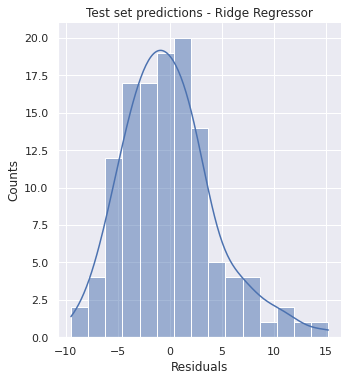

In [ ]:
# Plot the residuals on the Test set
Y_pred = model.predict(X_test)
ax = sns.displot(Y_test-Y_pred, kind='hist', kde=True, bins=15, aspect=1)
ax.set(xlabel="Residuals", ylabel="Counts", title="Test set predictions - Ridge Regressor")

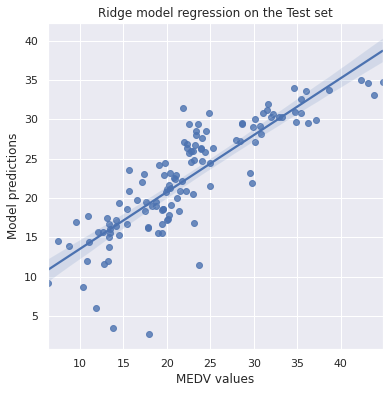

In [ ]:
# Regression plot
plt.figure(figsize=(6,6))
ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set(xlabel='MEDV values', ylabel='Model predictions', title="Ridge model regression on the Test set")
plt.show()

As we can see, both the accuracy value and the histogram of residuals on the test set are very similar to the ones obtained before for the Linear Regressor. Also the model regression is comparable to the one seen in 4.1 .

### 4.2.3 Train-vs-Test splitting with different seeds

In [ ]:
# Testing multiple seeds to get an average accurancy value
acc = []
avg = 0
for seed in range(1,11):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))   
    acc.append(output_result)
    avg += output_result
avg /= len(acc)
print("Average accuracy over the", len(acc), "seeds tested:", round(avg,3), "%")

Seed  1 - Accuracy: 71.998%
Seed  2 - Accuracy: 69.367%
Seed  3 - Accuracy: 72.341%
Seed  4 - Accuracy: 77.153%
Seed  5 - Accuracy: 76.173%
Seed  6 - Accuracy: 73.209%
Seed  7 - Accuracy: 72.936%
Seed  8 - Accuracy: 76.105%
Seed  9 - Accuracy: 70.925%
Seed 10 - Accuracy: 73.201%
Average accuracy over the 10 seeds tested: 73.341 %


### 4.2.4 K-fold Cross-Validation

In [ ]:
# Import modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Set parameters for the CV
folds = 10
seed = 9
kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

In [ ]:
# Run the Ridge regression, computing 3 different performance scores
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scorenames = ['MAE', 'MSE', 'R^2']

for i in range(len(scores)):
  t = 1
  name = scorenames[i]
  S = scores[i]
  results = cross_val_score(model, X, Y, cv=kfold, scoring=S)
  if name in ['MAE','MSE']: t = -1
  print(name + " : %.3f (%.3f)" % (t*results.mean(), results.std()))

MAE : 3.138 (0.458)
MSE : 17.348 (5.512)
R^2 : 0.711 (0.036)


### 4.2.5 Repeated Random Test-Train Split

In [ ]:
# Import modules
from sklearn.model_selection import ShuffleSplit

# Set parameters for the CV
n_splits = 100
test_size = 0.25
seed = 9

# Evaluation with the Shuffle-Split CV
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

In [ ]:
# Run the Repeated Random Test-Train Split, computing 3 different performance scores
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scorenames = ['MAE', 'MSE', 'R^2']

for i in range(len(scores)):
  t = 1
  name = scorenames[i]
  S = scores[i]
  results = cross_val_score(model, X, Y, cv=kfold, scoring=S)
  if name in ['MAE','MSE']: t = -1
  print(name + " : %.3f (%.3f)" % (t*results.mean(), results.std()))

MAE : 3.157 (0.228)
MSE : 17.773 (3.022)
R^2 : 0.708 (0.047)


# 5 Linear models comparison

I tested two alternative linear models, LinearRegression and Ridge. For each one, I evaluated the performance with 3 validation techniques: average accuracy over a range of random seed values; 10-fold Cross Validation; repeated random Test/Train split (100 random splits).

To compare the two algorithms' performance, I summarized the results in the following table.

(Note: '**LR**' = Linear Regression ; '**RR**' = Ridge Regression ; '**TvsT split**' = repeated random Test/Train split)

In [ ]:
cols = ['R^2', 'MAE', 'MSE']
rows = ['LR - multi seed', 'LR - 10 fold CV', 'LR - TvsT split ', 'RR - multi seed', 'RR - 10 fold CV', 'RR - TvsT split']
S_linear = [['0.736', '/', '/'], ['0.710 ± 0.037', '3.119 ± 0.454', '17.396 ± 5.555'], ['0.707 ± 0.052', '3.134 ± 0.234', '17.837 ± 3.242']]
S_ridge  = [['0.733', '/', '/'], ['0.711 ± 0.036', '3.138 ± 0.458', '17.348 ± 5.512'], ['0.708 ± 0.047', '3.157 ± 0.228', '17.773 ± 3.022']]
S = S_linear
S.extend(S_ridge)
table = pd.DataFrame(S)
table.index = rows
table.columns = cols
table

,R^2,MAE,MSE
LR - multi seed,0.736,/,/
LR - 10 fold CV,0.710 ± 0.037,3.119 ± 0.454,17.396 ± 5.555
LR - TvsT split,0.707 ± 0.052,3.134 ± 0.234,17.837 ± 3.242
RR - multi seed,0.733,/,/
RR - 10 fold CV,0.711 ± 0.036,3.138 ± 0.458,17.348 ± 5.512
RR - TvsT split,0.708 ± 0.047,3.157 ± 0.228,17.773 ± 3.022


As expected, the two models performance is very similar, given that they are both linear models with only few differences. Therefore, in the final part of my project I will evaluate a different, non-linear model, to try to achieve a performance superior to the ~70% accuracy scored so far by the two linear models.

# 6. Non-linear models: Ensemble methods

To improve the accuracy of predictions on the Test set, I decided to try a non-linear model. An interesting and popular cathegory of such models are the **Ensemble methods**. The rationale behind these methods is to collect predictions from multiple individual models, combine them (in different ways, depending on the method) and finally obtain the 'Ensemble' prediction.

One of the main groups of Ensemble algorithms are the **Boosting** algorithms. The workflow of this class of methods involves building multiple models (typically of the same type), where each model learns to fix the prediction errors of the prior models in the sequence.

In the Boosting methods framework as well as in general, **Stochastic Gradient Boosting** (also known as Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. This algorithm is proving to be perhaps one of the best techniques available for improving performance via ensembles.

## 6.1 Stochastic Gradient Boosting

I decided to implement and train on my dataset a Stochastic Gradient Boosting model, using the GradientBoostingRegressor module. To evaluate this model, I will carry out a 10-fold Cross Validation, as I did for the linear models.

In [ ]:
# Import modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.ensemble import GradientBoostingRegressor

# Set parameters for the CV
folds = 10
seed = 9
kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

The Stochastic Gradient Boosting Regressor trains $n$ Decision Trees, each working on the output of the previous model trying to correct their errors. This model has some interesting parameters, on which I focused:

1.   ***n_estimators*** = the number of individual Trees in the series, _i.e._ the number of boosting stages to perform ( $n$ )
2.   ***max_depth*** = Maximum depth of the individual regression estimators. This depth limits the number of nodes in the tree.
3.   ***random_state*** = Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split.

The default number of trees is 100, while the default max depth is 3. I wanted to optimize these parameters, so I designed a simple 2-dimensional Grid Search, to investigate the following sets of values (in the vicinity of defaults), respectively:

*   n_estimators = [80, 90, 100, 110, 120]
*   max_depth = [2, 3, 4, 5, 6]

Moreover, to reduce the effect of the random seed choice, I decided to test, for each combination of (n_estimators,max_depth), different seed values from 5 to 10. I then computed the average accuracy across these seed values, and considered this average to define the optimal pair of values for the other two parameters.

The whole Grid Search process is carried out in the following cell.

_( Caution! the cell below takes ~ 3 min to run )_

In [ ]:
# 2-D Grid Search to optimize Stochastic Gradient Boosting Regression

best_score = 0                      # variable keeping track of the best score achieved
optimized = []                      # list with the model best score, and the optimal values for each variable

# Grid search values
trees = [80, 90, 100, 110, 120]     # 'n_estimators' values to be tested
depth = [2, 3, 4, 5, 6]             # 'max_depth'    values to be tested
seeds = list(range(5,11))

for t in trees:
  for d in depth:
    S = 0
    for seed in seeds:
      model = GradientBoostingRegressor(random_state=seed, n_estimators=t, max_depth=d)   # model definition
      results = cross_val_score(model, X, Y, cv=kfold)
      S += results.mean()
    S /= len(seeds)
    if S > best_score : 
      optimized = [S, t, d]
      best_score = S

print("Best accuracy score (averaged over", len(seeds), "seeds) :", optimized[0])
print("Best scoring 'num_trees' value :", optimized[1])
print("Best scoring 'max_depth' value :", optimized[2])

Best accuracy score (averaged over 6 seeds) : 0.8580171329984608
Best scoring 'num_trees' value : 80
Best scoring 'max_depth' value : 4


As we can see, the optimized parameters are:  n\_estimators = **80** , max\_depth = **4** . The estimated average accuracy is around **85.8**%.

Setting these optimal values, and using any arbitrary random seed, I can obtain an Accuracy (R^2) value which is indeed comparable to the average just computed in the Grid Search.
Moreover, I can even compute MSE and MAE error metrics, as I did for the previous models.

In [ ]:
# Parameters-tuned Stochastic Gradient Boosting Regression

# Tuned parameters
num_trees = 80
max_depth = 4
seed = 9                # to be consistent with previous models

# Regression
model = GradientBoostingRegressor(n_estimators=num_trees, max_depth=max_depth, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy : %.3f%%" % (results.mean()*100))

Accuracy : 85.723%


In [ ]:
# Run the Stochastic Gradient Boosting Regression, computing 3 different performance scores
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scorenames = ['MAE', 'MSE', 'R^2']

for i in range(len(scores)):
  t = 1
  name = scorenames[i]
  S = scores[i]
  results = cross_val_score(model, X, Y, cv=kfold, scoring=S)
  if name in ['MAE','MSE']: t = -1
  print(name + " : %.3f (%.3f)" % (t*results.mean(), results.std()))

MAE : 2.015 (0.285)
MSE : 7.894 (2.827)
R^2 : 0.857 (0.068)


The error metric show a very high accuracy of predictions, and a low error rate.

# 7 Conclusions

It is immediately clear that the Ensemble Boosting model outperforms both linear models:

1.   Accuracy (R^2) increased by ~15%, from 0.71 to 0.86
2.   Mean Absolute Error (MAE) decreased from 3.1 to 2.0
3.   Mean Squared Error (MSE) decreased from 17.5 to 7.9

Overall, Stochastic Gradient Boosting Regression proved to be definitely superior to the two linear models tested, which obtained very similar results to each other.